In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import savReaderWriter

In [3]:
#load survey data

with savReaderWriter.SavReader('Dataset - 2017 Pew Research Center Science and News Survey (2017).sav') as reader:
    data = reader.all()

In [4]:
#load metadata, extract variable names, convert from bytes to utf-8

with savReaderWriter.SavHeaderReader('Dataset - 2017 Pew Research Center Science and News Survey (2017).sav') as header:
    metadata = header.all()
    variables = metadata.varNames

for i in range(len(variables)):
    variables[i] = variables[i].decode('utf-8')

In [5]:
#add variables to data and convert to dataframe, remove those who don't identify as Rep, Dem, or Independent (296)

pew_df = pd.DataFrame(data)
pew_df.columns = variables
parties = ['Republican', 'Democrat', 'Independent']

party_df = pew_df.loc[(pew_df['PARTY'] != -1) & (pew_df['PARTY'] != 4)].copy(deep=True)
party_df.index = range(len(party_df))

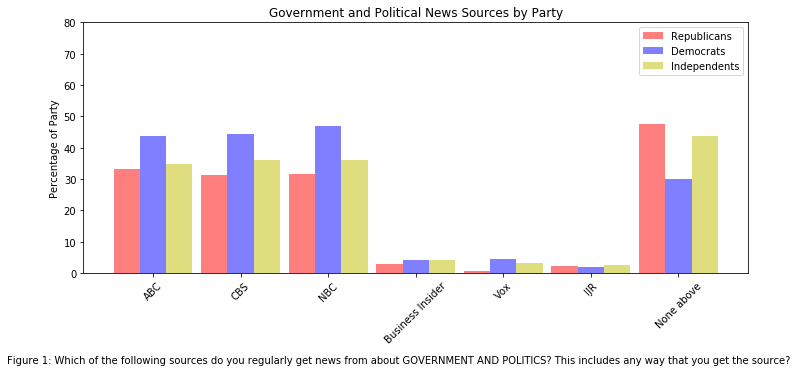

,ABC,CBS,NBC,Business Insider,Vox,Independent Journal Review,None above
Republican,33.246978,31.174439,31.519862,2.936097,0.518135,2.245250,47.668394
Democrat,43.658892,44.387755,46.938776,4.227405,4.373178,1.895044,30.029155
Independent,34.891486,35.976628,36.143573,4.173623,3.088481,2.587646,43.906511


In [11]:
#Create figure for political source question 1 data

#ABC, CBS, NBC, Business Insider, Vox, Independent Journal Review, None of the above
political_source1 = party_df.groupby('PARTY')['POLSOURCE1_1', 'POLSOURCE1_2', 'POLSOURCE1_3', 'POLSOURCE1_4', 'POLSOURCE1_5', 'POLSOURCE1_6', 'POLSOURCE1_99'].sum()
political_source1.columns = ['ABC', 'CBS', 'NBC', 'Business Insider', 'Vox', 'Independent Journal Review', 'None above']
political_source1.index = parties
party_n = [1158, 1372, 1198]

#convert to %
for i in range(3):
    for ii in range(len(political_source1.iloc[i])):
        political_source1.iloc[i][ii] = political_source1.iloc[i][ii]/party_n[i]*100
        

ind = np.arange(len(political_source1.columns))
width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
txt = 'Figure 1: Which of the following sources do you regularly get news from about GOVERNMENT AND POLITICS? This includes any way that you get the source?'

rep_bars = ax.bar(ind - width, political_source1.loc['Republican'], width, label='Republicans', color='r', alpha=0.5)
dem_bars = ax.bar(ind, political_source1.loc['Democrat'], width, label='Democrats', color='b', alpha=0.5)
ind_bars = ax.bar(ind + width, political_source1.loc['Independent'], width, label='Independents', color='y', alpha=0.5)

ax.set_ylabel('Percentage of Party')
ax.set_ylim(0,80)
ax.set_title('Government and Political News Sources by Party')
ax.set_xticklabels(['','ABC','CBS', 'NBC', 'Business Insider', 'Vox', 'IJR', 'None above'], rotation=45)
ax.legend()

fig.text(0.5, -.02, txt, ha='center')
fig.tight_layout()
plt.show()

political_source1

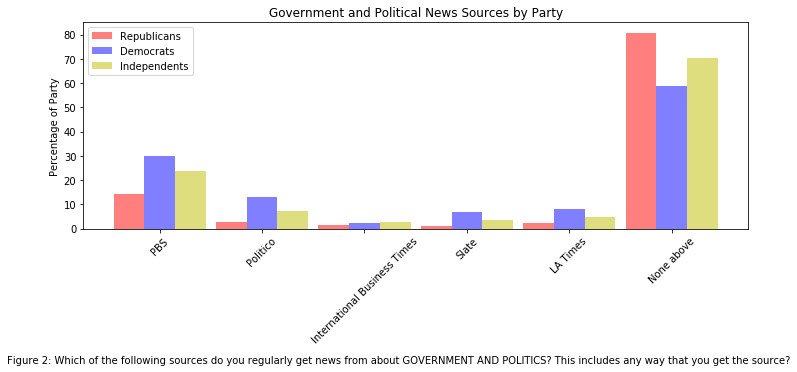

,PBS,Politico,Internation Business Times,Slate,LA Times,None above
Republican,14.075993,2.590674,1.468048,1.036269,2.158895,80.829016
Democrat,30.102041,12.827988,2.332362,6.924198,8.163265,58.965015
Independent,23.706177,7.095159,2.838063,3.422371,4.590985,70.200334


In [13]:
#Create figure for political source question 2 data

#PBS, Politico, International Business Times, Slate, Los Angeles Times, None of the above
political_source2 = party_df.groupby('PARTY')['POLSOURCE2_1', 'POLSOURCE2_2', 'POLSOURCE2_3', 'POLSOURCE2_4', 'POLSOURCE2_5', 'POLSOURCE2_99',].sum()
political_source2.columns = ['PBS','Politico', 'Internation Business Times', 'Slate', 'LA Times', 'None above']
political_source2.index = parties

#convert to %
for i in range(3):
    for ii in range(len(political_source2.iloc[i])):
        political_source2.iloc[i][ii] = political_source2.iloc[i][ii]/party_n[i]*100
        

ind = np.arange(len(political_source2.columns))
width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
txt = 'Figure 2: Which of the following sources do you regularly get news from about GOVERNMENT AND POLITICS? This includes any way that you get the source?'

rep_bars = ax.bar(ind - width, political_source2.loc['Republican'], width, label='Republicans', color='r', alpha=0.5)
dem_bars = ax.bar(ind, political_source2.loc['Democrat'], width, label='Democrats', color='b', alpha=0.5)
ind_bars = ax.bar(ind + width, political_source2.loc['Independent'], width, label='Independents', color='y', alpha=0.5)

ax.set_ylabel('Percentage of Party')
ax.set_ylim(0,85)
ax.set_title('Government and Political News Sources by Party')
ax.set_xticklabels(['','PBS','Politico', 'International Business Times', 'Slate', 'LA Times', 'None above'], rotation=45)
ax.legend()

fig.text(0.5, -.02, txt, ha='center')
fig.tight_layout()
plt.show()

political_source2

Create bar graph to show the differences in interest of news topics between parties. Note that the original data was coded so that a lower score meant greater interest in the topic (i.e. a 1 = Very interested). Counts for the first variable are printed below to show the scores being reversed for easier interpretation.

In [15]:
#a = Gvmt/politics, b = News/local, c = Sports, d = Business/Finance, e = Science, f = Entertainment
variable_list = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d', 'TOPICINT_e', 'TOPICINT_f']
print(party_df.groupby(['TOPICINT_a']).size())

#Reverse code answers for easier interpretation (i.e. higher score = more interest) and removed -1 'No answers'

for i in range(len(variable_list)):
    for ii in range(len(party_df.loc[:, variable_list[i]])):
        try:
            if party_df.loc[ii, variable_list[i]] == -1:
                party_df.loc[ii, variable_list[i]] = None
            else:
                party_df.loc[ii, variable_list[i]] = 5-party_df.loc[ii, variable_list[i]]
        except:
            print

print(party_df.groupby(['TOPICINT_a']).size())

news_means = party_df.groupby(['PARTY'])['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d', 'TOPICINT_e', 'TOPICINT_f'].mean()
news_means.columns = ['Government/Politics', 'Local News', 'Sports', 'Business and Finance', 'Science', 'Entertainment']
news_means.index = parties
news_means

TOPICINT_a
-1.0      13
 1.0    1264
 2.0    1502
 3.0     623
 4.0     326
dtype: int64
TOPICINT_a
1.0     326
2.0     623
3.0    1502
4.0    1264
dtype: int64


,Government/Politics,Local News,Sports,Business and Finance,Science,Entertainment
Republican,3.006066,3.273438,2.441355,2.759516,2.816291,2.228101
Democrat,3.123719,3.351608,2.431918,2.693937,3.001464,2.619430
Independent,2.843515,3.223618,2.343384,2.703177,2.953820,2.276987


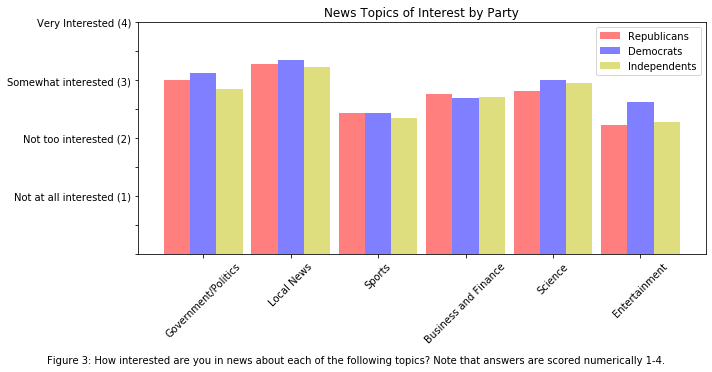

In [18]:
#Create box plot of news_means

ind = np.arange(len(news_means.columns))
width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
txt='Figure 3: How interested are you in news about each of the following topics? Note that answers are scored numerically 1-4.'

rep_bars = ax.bar(ind-width, news_means.loc['Republican'], width, label='Republicans', color='r', alpha=0.5)
dem_bars = ax.bar(ind, news_means.loc['Democrat'], width, label='Democrats', color='b', alpha=0.5)
ind_bars = ax.bar(ind+width, news_means.loc['Independent'], width, label='Independents', color='y', alpha=0.5)

ax.set_ylim(0,4)
ax.set_title('News Topics of Interest by Party')
ax.set_xticklabels(['','Government/Politics', 'Local News', 'Sports', 'Business and Finance', 'Science', 'Entertainment'], rotation=45)
ax.set_yticklabels(['','', 'Not at all interested (1)', '', 'Not too interested (2)', '', 'Somewhat interested (3)', '','Very Interested (4)'])
ax.legend()

fig.text(0.5, -.02, txt, ha='center')
fig.tight_layout()
plt.show()